# Kwanza Tukule Data Analyst Assessment
Author : Keziah Gicheha 

Date : 31/01/2025

Tools used: Python(Pandas, Numpy, Matplotlib, Seaborn)

## Introduction 

This notebook presents an analysis of anonymized sales data provided by Kwanza Tukule. The goal of this assessment is to evaluate data cleaning, preparation, and analytical skills by addressing key tasks, including:

* Identifying and resolving data quality issues (e.g., missing values, duplicates, inconsistent data types).
* Performing feature engineering to create new useful columns.
* Conducting exploratory data analysis (EDA) to uncover trends and insights.
* Providing actionable recommendations based on data findings.




### Section 1: Data Cleaning and Preparation

This section outlines the steps taken to clean and prepare the dataset for analysis. The dataset represents anonymized sales data from Kwanza Tukule.


In [2]:
#import necessary libraries fot the data cleaning, visualization and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
data = pd.read_csv('Data/kwanza_tukule.csv')

#check the first 5 rows of the data
data.head(5)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,"2,605"
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,"1,480"


### 1.1 Data Quality Assessment

In [3]:
#Inspect the dataset
print(data.info())

print(data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 333405 non-null  object
 1   ANONYMIZED CATEGORY  333405 non-null  object
 2   ANONYMIZED PRODUCT   333405 non-null  object
 3   ANONYMIZED BUSINESS  333405 non-null  object
 4   ANONYMIZED LOCATION  333405 non-null  object
 5   QUANTITY             333405 non-null  int64 
 6   UNIT PRICE           333397 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.8+ MB
None
            QUANTITY
count  333405.000000
mean        2.321186
std         3.790614
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       359.000000


#### Check for Missing Values

In [4]:
#Check for missing values
print("Missing values per column:\n", data.isnull().sum())
print("Missing values per column:\n", data.isnull().sum()* 100 / len(data))

Missing values per column:
 DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             8
dtype: int64
Missing values per column:
 DATE                   0.000000
ANONYMIZED CATEGORY    0.000000
ANONYMIZED PRODUCT     0.000000
ANONYMIZED BUSINESS    0.000000
ANONYMIZED LOCATION    0.000000
QUANTITY               0.000000
UNIT PRICE             0.002399
dtype: float64


From the output above, the column named "UNIT PRICE" has missing values. 
Because it is a small percentage of 0.002% the best approach to handle this would be to drop those 8 rows as it will have no sifnificant impact to the analysis.

This also ensures that I  will not introduce any artificial bias - important in ensuring ethics in Data Science.

##### Drop Missing Values

In [5]:
# Drop the missing values
data = data.dropna(subset="UNIT PRICE")



In [6]:
#Check for missing values
print("Missing values per column:\n", data.isnull().sum())


Missing values per column:
 DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
dtype: int64


There are no missing values in the dataset. 

#### Check for Duplicates

In [7]:
#check for duplicates
print("Number of duplicates: ", data.duplicated().sum())

Number of duplicates:  3524


There are 3524 rows that are duplicated rows, to ensure accurate analysis they need to be removed

##### Drop Duplicates

In [8]:
#drop duplicates
data = data.drop_duplicates()
print("Number of duplicates: ", data.duplicated().sum())

Number of duplicates:  0


The duplicated values have been dropped/deleted from the dataset.

In [9]:
#check data types
print("Data types:\n", data.dtypes)

Data types:
 DATE                   object
ANONYMIZED CATEGORY    object
ANONYMIZED PRODUCT     object
ANONYMIZED BUSINESS    object
ANONYMIZED LOCATION    object
QUANTITY                int64
UNIT PRICE             object
dtype: object


#### Check for Unique Values

In [10]:
#check for unique values
print("Unique values:\n", data.nunique())


Unique values:
 DATE                   96702
ANONYMIZED CATEGORY       46
ANONYMIZED PRODUCT       817
ANONYMIZED BUSINESS     4800
ANONYMIZED LOCATION       53
QUANTITY                  79
UNIT PRICE              1050
dtype: int64


From the output above, the dataset has unique values from each column. This will be explored more in the analysis section.


#### Check the Datatypes

In [11]:
#check the datatypes
print("Data types:\n", data.dtypes)

Data types:
 DATE                   object
ANONYMIZED CATEGORY    object
ANONYMIZED PRODUCT     object
ANONYMIZED BUSINESS    object
ANONYMIZED LOCATION    object
QUANTITY                int64
UNIT PRICE             object
dtype: object


from the datatype above, the column date needs to be changed from object to a datetype datatype while unit price needs to be converted to integer or float depending on how the prices are looking

In [12]:
#convert UNIT PRICE to integer
#first remove commas 
data['UNIT PRICE'] = data['UNIT PRICE'].str.replace(',', '', )
#convert to integer
data['UNIT PRICE'] = data['UNIT PRICE'].astype('int64')
# Display the updated dataframe
print(data.head(2))


                       DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0  August 18, 2024, 9:32 PM        Category-106       Product-21f4   
1  August 18, 2024, 9:32 PM        Category-120       Product-4156   

  ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY  UNIT PRICE  
0       Business-de42       Location-1ba8         1         850  
1       Business-de42       Location-1ba8         2        1910  


#### 1.2 Feature Engineering

#### Convert DATE Column to Datetime

In [13]:
#convert the date value to a datetime formart
data['DATE'] = pd.to_datetime(data['DATE'])
# Display the updated dataframe
print(data.head(2))


<ipython-input-13-02c5d6767e47>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DATE'] = pd.to_datetime(data['DATE'])


                 DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0 2024-08-18 21:32:00        Category-106       Product-21f4   
1 2024-08-18 21:32:00        Category-120       Product-4156   

  ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY  UNIT PRICE  
0       Business-de42       Location-1ba8         1         850  
1       Business-de42       Location-1ba8         2        1910  


#### Create Month-Year Column

In [14]:

# Create "Month-Year" column
data['Month-Year'] = data['DATE'].dt.strftime('%B %Y')

# Display the updated dataframe
print(data.head(3))

                 DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0 2024-08-18 21:32:00        Category-106       Product-21f4   
1 2024-08-18 21:32:00        Category-120       Product-4156   
2 2024-08-18 21:32:00        Category-121       Product-49bd   

  ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY  UNIT PRICE   Month-Year  
0       Business-de42       Location-1ba8         1         850  August 2024  
1       Business-de42       Location-1ba8         2        1910  August 2024  
2       Business-de42       Location-1ba8         1        3670  August 2024  


#### Lowecase the Column Names and use underscore instead of spacing names

In [15]:
#lowecase the column names
data.columns = data.columns.str.lower().str.replace(' ', '_')
print(data.columns)

Index(['date', 'anonymized_category', 'anonymized_product',
       'anonymized_business', 'anonymized_location', 'quantity', 'unit_price',
       'month-year'],
      dtype='object')


For readablity and ease of use I have lowercased the column names and used underscores instead of spacing.

In [16]:
data.dtypes

date                   datetime64[ns]
anonymized_category            object
anonymized_product             object
anonymized_business            object
anonymized_location            object
quantity                        int64
unit_price                      int64
month-year                     object
dtype: object

In [17]:
data.describe()

,date,quantity,unit_price
count,329873,329873.000000,329873.000000
mean,2024-07-18 11:47:54.002236672,2.321469,2319.016579
min,2024-01-01 05:54:00,0.000000,0.000000
25%,2024-04-30 16:34:00,1.000000,1420.000000
50%,2024-07-29 18:40:00,1.000000,1840.000000
75%,2024-10-14 21:32:00,2.000000,2750.000000
max,2024-12-31 18:24:00,359.000000,16136.000000
std,NaN,3.767697,1582.578700


#### Creating a Copy of the Cleaned DataFrame


In [18]:
#create a copy of the cleaned dataframe for further analysis
kt_clean_df = data.copy()
kt_clean_df.head(2)

,date,anonymized_category,anonymized_product,anonymized_business,anonymized_location,quantity,unit_price,month-year
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850,August 2024
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910,August 2024


## SECTION 2 : EXPLORATORY DATA ANALYSIS (EDA)

2.1 Calculate Total Quantity and Value


In [22]:
# Calculate total Quantity and Value grouped by Anonymized Category

#calculate the value for each row
kt_clean_df['total_value'] = kt_clean_df['quantity'] * kt_clean_df['unit_price']

#Group by anonymized category and aggregate total quantity and value
grouped_category = kt_clean_df.groupby('anonymized_category').agg({'quantity': 'sum', 'total_value': 'sum'}).reset_index()

# Sort the grouped dataframe by total value in descending order
grouped_category = grouped_category.sort_values(by='total_value', ascending=False)
print(grouped_category)


   anonymized_category  quantity  total_value
25         Category-75    151330    544658700
26         Category-76     71719    344939553
18        Category-120    169715    319178743
0         Category-100     76824    134902751
17        Category-119     68332    103454819
27         Category-77     28455     76741382
38         Category-91     20853     44152103
1         Category-101     19564     35577822
34         Category-85     22997     33762533
19        Category-121     14669     22327643
40         Category-94     23668     16750815
39         Category-92      6953     10468723
28         Category-78      9766      9792609
41         Category-95      4116      7466932
33         Category-84     11933      6798158
5         Category-106      6521      5932763
9         Category-110     10529      5483386
7         Category-108      9756      5101375
10        Category-111      6715      4387343
6         Category-107      2729      4170797
32         Category-83      2436  

 Visualizations of the Data

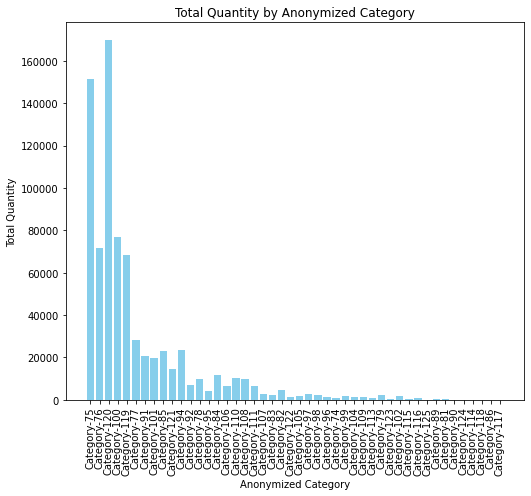

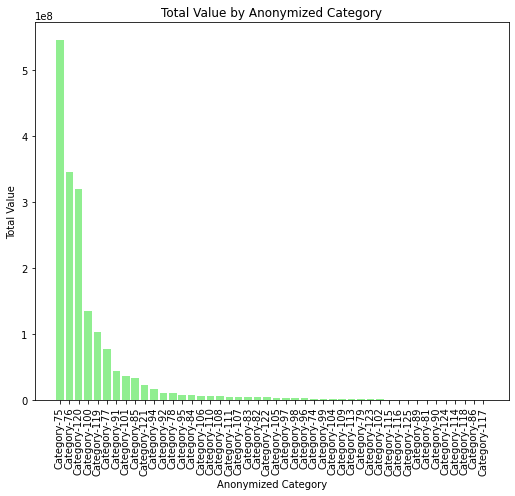

In [26]:
# Plot total Quantity and Value grouped by Anonymized Category
plt.figure(figsize=(14, 7))

# Total Quantity by Anonymized Category
plt.subplot(1, 2, 1)
plt.bar(grouped_category['anonymized_category'], grouped_category['quantity'], color='skyblue')
plt.xlabel('Anonymized Category')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Anonymized Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



# Total Value by Anonymized Category

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 2)
plt.bar(grouped_category['anonymized_category'], grouped_category['total_value'], color='lightgreen')
plt.xlabel('Anonymized Category')
plt.ylabel('Total Value')
plt.title('Total Value by Anonymized Category')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### Total Quantity and Value Grouped by Anonymized Business

In [29]:
# Calculate total Quantity and Value grouped by Anonymized Business
business_grouped = kt_clean_df.groupby('anonymized_business').agg({'quantity': 'sum', 'total_value': 'sum'}).reset_index()


# Sort the grouped dataframe by total value in descending order
business_grouped = business_grouped.sort_values(by='total_value', ascending=False)


# Display the grouped data
business_grouped.head(10)

,anonymized_business,quantity,total_value
2906,Business-978e,13991,28037358
4781,Business-fe7d,6743,26997121
1873,Business-6068,8214,16464195
144,Business-07de,6065,16258068
2353,Business-7a03,6318,13968451
3533,Business-ba13,5533,13650016
584,Business-1e3e,4981,13192967
1385,Business-468e,5450,12546597
4585,Business-f4f4,3852,11952941
1674,Business-5613,4089,11895552


In [35]:
# Calculate total Quantity and Value grouped by Anonymized Business
business_grouped_qt = kt_clean_df.groupby('anonymized_business').agg({'quantity': 'sum', 'total_value': 'sum'}).reset_index()


# Sort the grouped dataframe by total value in descending order
business_grouped_qt= business_grouped.sort_values(by='quantity', ascending=False)


# Display the grouped data
business_grouped_qt.head(10)

,anonymized_business,quantity,total_value
2906,Business-978e,13991,28037358
1873,Business-6068,8214,16464195
4781,Business-fe7d,6743,26997121
2353,Business-7a03,6318,13968451
144,Business-07de,6065,16258068
3533,Business-ba13,5533,13650016
1385,Business-468e,5450,12546597
584,Business-1e3e,4981,13192967
3851,Business-cb1f,4636,9602700
2503,Business-80b3,4303,9275497


#### Top 10 Anonymized Businesses by Total Value

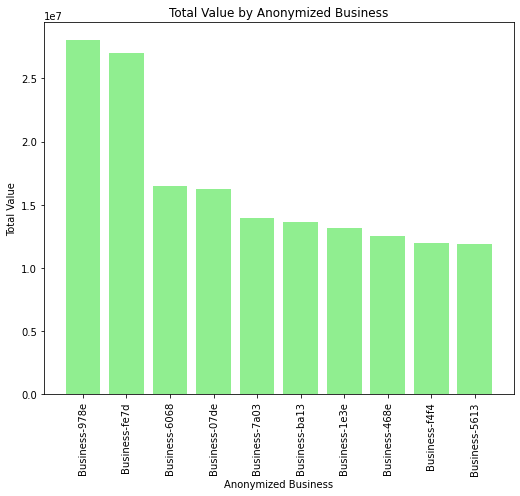

In [ ]:
#visualize the first 10 businesses

plt.figure(figsize=(14, 7)) 

# Total Value by Anonymized Business
plt.subplot(1, 2, 2)
plt.bar(business_grouped['anonymized_business'][:10], business_grouped['total_value'][:10], color='lightgreen')
plt.xlabel('Anonymized Business')
plt.ylabel('Total Value')
plt.title('Total Value by Anonymized Business')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### Top 10 Anonymized Businesses by Total Quantity 

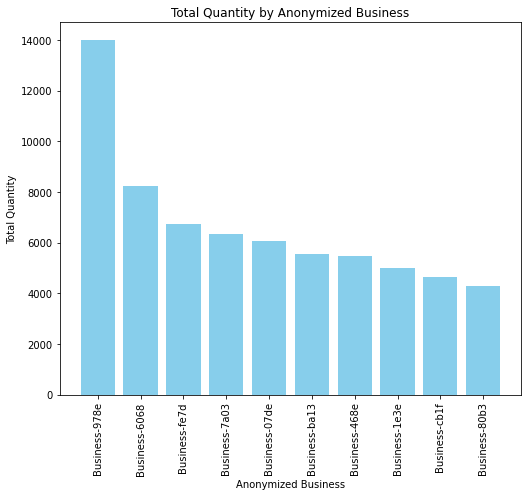

In [36]:
# Plot total Quantity and Value grouped by Anonymized Business
plt.figure(figsize=(14, 7))

# Total Quantity by Anonymized Business
plt.subplot(1, 2, 1)
plt.bar(business_grouped_qt['anonymized_business'][:10], business_grouped_qt['quantity'][:10], color='skyblue')
plt.xlabel('Anonymized Business')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Anonymized Business')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 2.2 Trends Over Time: Analyze sales trends (Value and Quantity) by Month-Year.

Create a time series plot to show seasonal patterns or changes in sales performance.

In [33]:
# Calculate total Quantity and Value by Month-Year
monthly_sales = kt_clean_df.groupby('month-year').agg({'quantity': 'sum', 'total_value': 'sum'}).reset_index()


# Convert Month-Year to datetime for proper sorting
monthly_sales['month-year'] = pd.to_datetime(monthly_sales['month-year'], format='%B %Y')

# Sort by Month-Year
monthly_sales = monthly_sales.sort_values('month-year')

# Display the grouped data
print(monthly_sales)

   month-year  quantity  total_value
4  2024-01-01     67526    185626186
3  2024-02-01     44063    126579702
7  2024-03-01     45381    116000676
0  2024-04-01     50554    122110750
8  2024-05-01     69551    168781502
6  2024-06-01     60716    135138614
5  2024-07-01     74689    171040881
1  2024-08-01     68837    146581003
11 2024-09-01     66747    137791455
10 2024-10-01     84739    183840551
9  2024-11-01     75361    165933104
2  2024-12-01     57626    109549774


Time Series Plot of Total Quantity over time

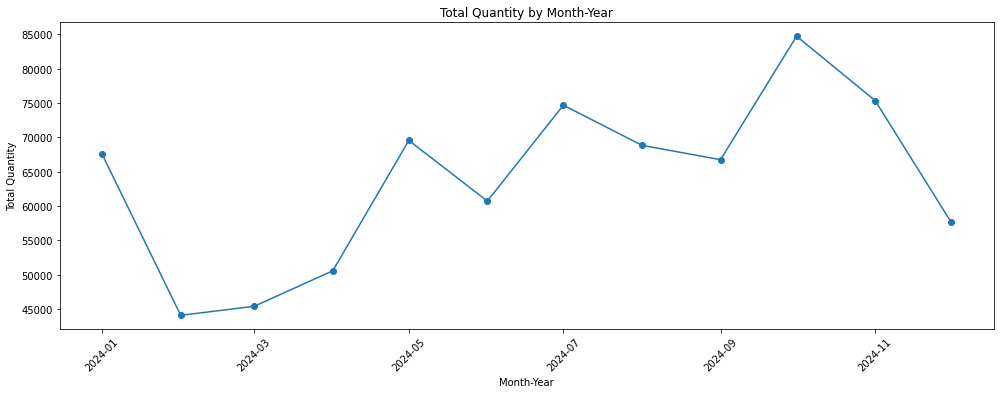

In [39]:
# Plot sales trends over time
plt.figure(figsize=(14, 10))

# Total Quantity over time
plt.plot(monthly_sales['month-year'], monthly_sales['quantity'], marker='o', linestyle='-')
plt.xlabel('Month-Year')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Month-Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Time Series Plot of Total Value over time

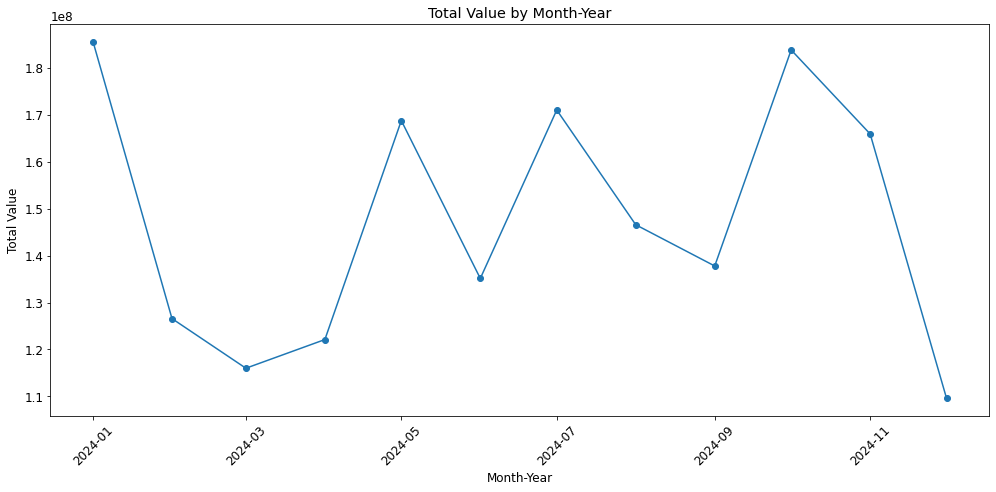

In [55]:

# Total Value over time
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales['month-year'], monthly_sales['total_value'], marker='o', linestyle='-')
plt.xlabel('Month-Year')
plt.ylabel('Total Value')
plt.title('Total Value by Month-Year')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 2.3 Performance Analysis:

Identify the top 5 most frequently purchased products (based on Quantity).



In [57]:
# Identify the top 5 most frequently purchased products based on Quantity
top_products = kt_clean_df.groupby('anonymized_product').agg({'quantity': 'sum'}).reset_index()
top_products = top_products.sort_values(by='quantity', ascending=False).head(5)

# Display the top 5 products
print(top_products)

    anonymized_product  quantity
338       Product-66e0     46957
750       Product-e805     42602
476       Product-8f75     37566
127       Product-29ee     35940
213       Product-4156     28487


(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 [Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000'),
  Text(0, 20000.0, '20000'),
  Text(0, 30000.0, '30000'),
  Text(0, 40000.0, '40000'),
  Text(0, 50000.0, '50000')])

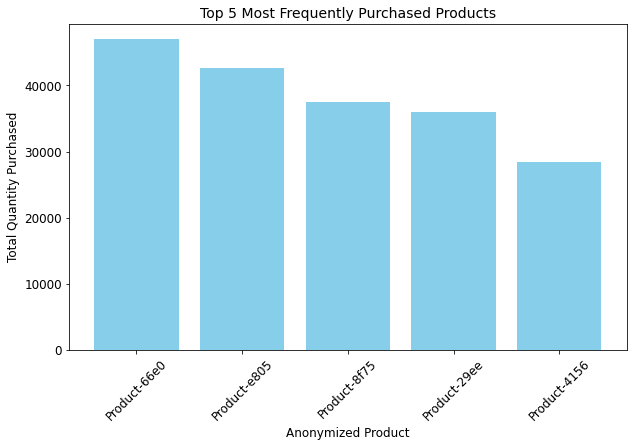

In [58]:
# Visualize the top 5 most frequently purchased products based on Quantity
plt.figure(figsize=(10, 6))
plt.bar(top_products['anonymized_product'], top_products['quantity'], color='skyblue')
plt.xlabel('Anonymized Product', fontsize=12)
plt.ylabel('Total Quantity Purchased', fontsize=12)
plt.title('Top 5 Most Frequently Purchased Products', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

#### Identify the top 5 most valuable products by based on Value


In [59]:
# Calculate total value for each product
kt_clean_df['total_value'] = kt_clean_df['quantity'] * kt_clean_df['unit_price']

# Identify the top 5 most valuable products based on Value
top_valuable_products = kt_clean_df.groupby('anonymized_product').agg({'total_value': 'sum'}).reset_index()
top_valuable_products = top_valuable_products.sort_values(by='total_value', ascending=False).head(5)

# Display the top 5 most valuable products
print(top_valuable_products)


    anonymized_product  total_value
750       Product-e805    262787281
476       Product-8f75    158797460
338       Product-66e0     70704225
127       Product-29ee     68248274
213       Product-4156     56956007


(array([0.0e+00, 5.0e+07, 1.0e+08, 1.5e+08, 2.0e+08, 2.5e+08, 3.0e+08]),
 [Text(0, 0.0, '0.0'),
  Text(0, 50000000.0, '0.5'),
  Text(0, 100000000.0, '1.0'),
  Text(0, 150000000.0, '1.5'),
  Text(0, 200000000.0, '2.0'),
  Text(0, 250000000.0, '2.5'),
  Text(0, 300000000.0, '3.0')])

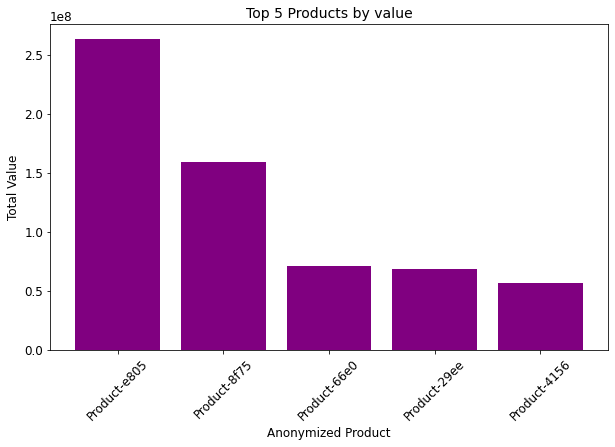

In [ ]:
# Visualize the top 5 most products based on value
plt.figure(figsize=(10, 6))
plt.bar(top_valuable_products['anonymized_product'], top_valuable_products['total_value'], color='purple')
plt.xlabel('Anonymized Product', fontsize=12)
plt.ylabel('Total Value', fontsize=12)
plt.title('Top 5 Products by value', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

### 3. Advanced Analysis

3.1 Customer Segmentation

Perform a segmentation analysis of businesses (Anonymized Business) based on their purchasing behavior:

Total Quantity purchased
Total Value contributed
Frequency of transactions

Classify businesses into 3 groups (e.g., High Value, Medium Value, Low Value) and provide recommendations for engagement with each group.

#### Aggretate Business Level Metrics

In [67]:
# Aggregate metrics per business
kt_business_df = kt_clean_df.groupby("anonymized_business").agg(
    total_quantity=("quantity", "sum"),
    total_value=("unit_price", "sum"),
    transaction_count=("date", "count")  # Frequency of purchases
).reset_index()

# Check summary statistics
print(kt_business_df.describe())


       total_quantity   total_value  transaction_count
count     4800.000000  4.800000e+03        4800.000000
mean       159.539583  1.593710e+05          68.723542
std        479.870741  3.629125e+05         149.042885
min          1.000000  0.000000e+00           1.000000
25%          5.000000  6.522500e+03           3.000000
50%         20.000000  2.525750e+04          11.000000
75%        114.000000  1.302732e+05          61.000000
max      13991.000000  4.976687e+06        2614.000000


#### Segment the businesses

In [68]:
from sklearn.cluster import KMeans
import numpy as np

# Select features for clustering
X = kt_business_df[["total_quantity", "total_value", "transaction_count"]]

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kt_business_df["segment"] = kmeans.fit_predict(X)

# Rename segments based on business value
kt_business_df["segment"] = kt_business_df["segment"].map({0: "Low Value", 1: "Medium Value", 2: "High Value"})

# Display segmented data
print(kt_business_df.head())


  anonymized_business  total_quantity  total_value  transaction_count  \
0       Business-0000               8        10445                  8   
1       Business-0005               1         2645                  1   
2       Business-0029              26        18385                  6   
3       Business-003d              98        73251                 31   
4       Business-0072             127       194501                101   

     segment  
0  Low Value  
1  Low Value  
2  Low Value  
3  Low Value  
4  Low Value  


#### View the segments


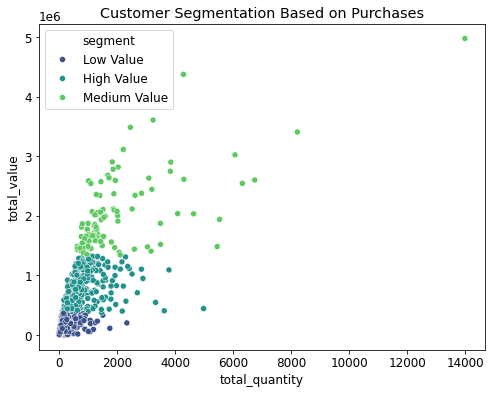

In [69]:
#using a scatterplot to visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=kt_business_df, x="total_quantity", y="total_value", hue="segment", palette="viridis")
plt.title("Customer Segmentation Based on Purchases")
plt.show()


### Recommendations for Engagement

High Value Business - Have a high spending and frequent transactions 

    Engagement strategies- Offer loyalty programs, priority support and bulk discounts. 

Medium Value Business  - Moderate spending and average frequency.

    Engagement strategies : Personalized promotions, targeted marketing campaigns

Low value Business - Have a low spending and infrequent transactions

    Engagement strategies : Retargeting ads, special offers abd first-timE buyer discounts.

3.2 Forecasting: Using the provided data, forecast the total sales (Value) for the next 3 months. Use an appropriate time-series forecasting method (e.g., ARIMA, moving average, or exponential smoothing).

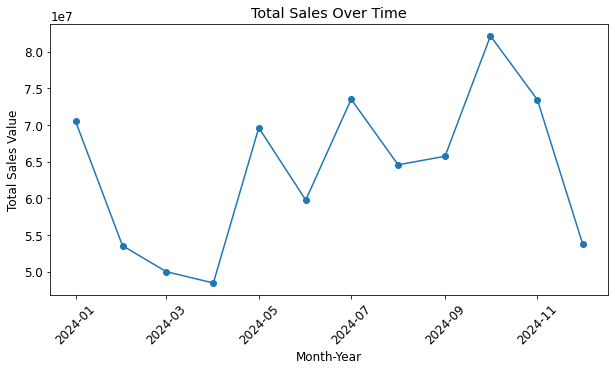

In [70]:
#prepare data and ensure the data is chronologically ordered for time series analysis

# Aggregate total sales per month-year
monthly_sales = kt_clean_df.groupby('month-year').agg({'unit_price': 'sum'}).reset_index()

# Rename column
monthly_sales.rename(columns={'unit_price': 'total_value'}, inplace=True)

# Convert Month-Year to datetime
monthly_sales['month-year'] = pd.to_datetime(monthly_sales['month-year'], format='%B %Y')

# Sort values for time-series processing
monthly_sales = monthly_sales.sort_values('month-year')

# Set Month-Year as index
monthly_sales.set_index('month-year', inplace=True)

# Plot to visualize trend
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales['total_value'], marker='o', linestyle='-')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Value')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.show()


#### Using ARIMA to forecast

ADF Statistic: -2.312432015412156
p-value: 0.1679897431612946


c:\Users\GICHEHA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\GICHEHA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\GICHEHA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\GICHEHA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


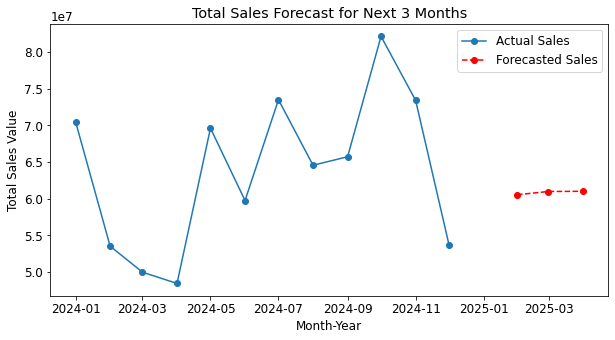

Forecasted Sales for Next 3 Months:
 2025-01-31    6.055243e+07
2025-02-28    6.099246e+07
2025-03-31    6.102073e+07
Freq: M, Name: predicted_mean, dtype: float64


In [71]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Check stationarity
result = adfuller(monthly_sales['total_value'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If p-value > 0.05, we need differencing
if result[1] > 0.05:
    monthly_sales['total_value_diff'] = monthly_sales['total_value'].diff().dropna()

# Fit ARIMA model (adjust p, d, q based on analysis)
model = ARIMA(monthly_sales['total_value'], order=(1, 1, 1))  # (p,d,q) values may need tuning
model_fit = model.fit()

# Forecast next 3 months
forecast = model_fit.forecast(steps=3)
forecast.index = pd.date_range(start=monthly_sales.index[-1], periods=4, freq='M')[1:]

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales['total_value'], marker='o', linestyle='-', label='Actual Sales')
plt.plot(forecast.index, forecast, marker='o', linestyle='--', color='red', label='Forecasted Sales')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Value')
plt.title('Total Sales Forecast for Next 3 Months')
plt.legend()
plt.show()

# Print Forecasted Values
print("Forecasted Sales for Next 3 Months:\n", forecast)


3.3 Anomaly Detection:Identify any unusual spikes or drops in sales performance (Quantity or Value) and explain possible reasons based on the data

Calculate Total Monthly Sales (Value) and Quantity

In [65]:
from sklearn.cluster import KMeans

# Select features for clustering
X = kt_business_df[["total_quantity", "total_value", "transaction_count"]]

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kt_business_df["segment"] = kmeans.fit_predict(X)

# Rename segments based on business value
kt_business_df["segment"] = kt_business_df["segment"].map({0: "Low Value", 1: "Medium Value", 2: "High Value"})

# Display segmented data
print(kt_business_df.head())


  anonymized_business  total_quantity  total_value  transaction_count  \
0       Business-0000               8        10445                  8   
1       Business-0005               1         2645                  1   
2       Business-0029              26        18385                  6   
3       Business-003d              98        73251                 31   
4       Business-0072             127       194501                101   

     segment  
0  Low Value  
1  Low Value  
2  Low Value  
3  Low Value  
4  Low Value  


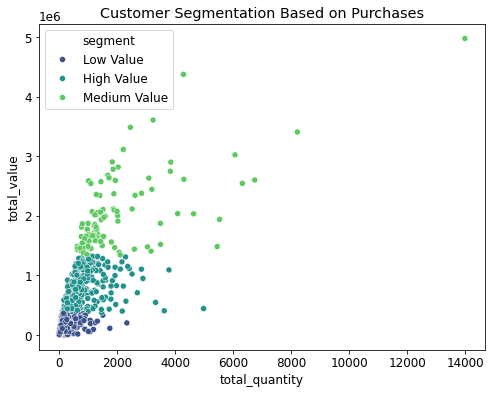

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=kt_business_df, x="total_quantity", y="total_value", hue="segment", palette="viridis")
plt.title("Customer Segmentation Based on Purchases")
plt.show()


#### Anomaly Detection:Identify any unusual spikes or drops in sales performance (Quantity or Value)

Plot sales trends to spot anomalies

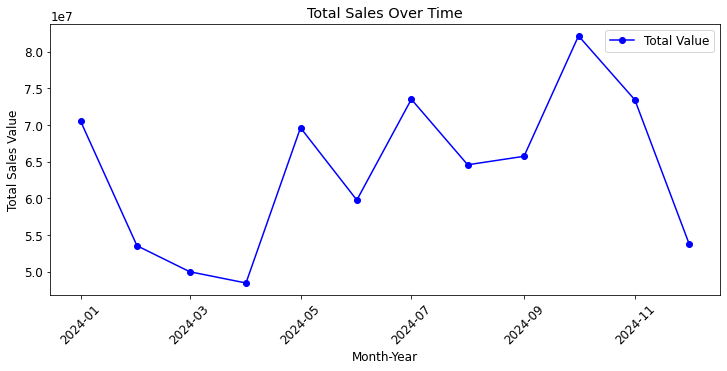

KeyError: 'quantity'

<Figure size 864x360 with 0 Axes>

In [72]:
import matplotlib.pyplot as plt

# Plot Total Value over time
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales.index, monthly_sales['total_value'], marker='o', linestyle='-', color='b', label="Total Value")
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Value')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot Quantity over time
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales.index, monthly_sales['quantity'], marker='o', linestyle='-', color='r', label="Quantity Sold")
plt.xlabel('Month-Year')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Possible Reasons for Anomalies

Promotions or Discounts:

Significant increases in sales might be due to promotions or discounts offered during certain periods.

Seasonal Trends:Sales might spike during holiday seasons or drop during off-peak periods.

Market Changes: Changes in market conditions, such as new competitors or economic factors, can impact sales performance.

Product Launches:Introduction of new products can lead to spikes in sales.


#### 3.4 Correlation Analysis:Examine relationships between Quantity and Value. Provide insights into which factors drive sales performance.

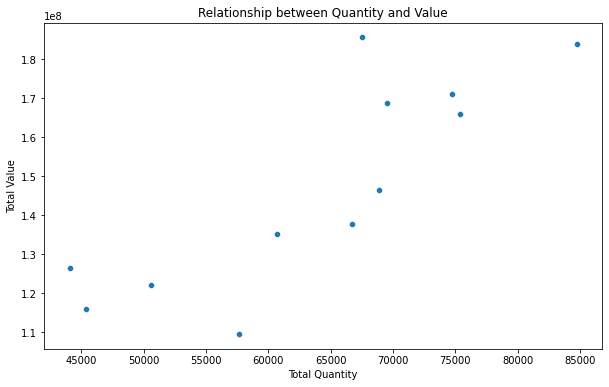

In [159]:
#Calculate Total Monthly Sales(Value) and Quantity

monthly_sales = kt_clean_df.groupby('month-year').agg({'total_value': 'sum', 'quantity': 'sum'}).reset_index()

# Convert Month-Year to datetime for proper sorting
monthly_sales['month-year'] = pd.to_datetime(monthly_sales['month-year'], format='%B %Y')

# Sort by Month-Year
monthly_sales = monthly_sales.sort_values('month-year')

# Set Month-Year as index
monthly_sales.set_index('month-year', inplace=True)

# Plot the relationship between Quantity and Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quantity', y='total_value', data=monthly_sales)
plt.xlabel('Total Quantity')
plt.ylabel('Total Value')
plt.title('Relationship between Quantity and Value')
plt.show()

In [160]:
#calculate correlation
# Calculate correlation between Quantity and Value
correlation = monthly_sales['quantity'].corr(monthly_sales['total_value'])
print(f"Correlation between Quantity and Value: {correlation}")


Correlation between Quantity and Value: 0.8310545840922671


In [161]:
#Give insights
# Insights into factors driving sales performance
if correlation > 0.7:
    insight = "There is a strong positive correlation between Quantity and Value, indicating that higher quantities sold are associated with higher sales value."
elif correlation > 0.3:
    insight = "There is a moderate positive correlation between Quantity and Value, suggesting that quantities sold have a noticeable impact on sales value."
else:
    insight = "There is a weak or no correlation between Quantity and Value, implying that other factors might be driving sales performance."

print("Insights into factors driving sales performance:")
print(insight)

Insights into factors driving sales performance:
There is a strong positive correlation between Quantity and Value, indicating that higher quantities sold are associated with higher sales value.


### Section 4: Strategic Insights and Recommendations (20 points)

    

1. Product Strategy: Based on your analysis, recommend one product category to prioritize for marketing campaigns. Justify your choice using the data.


2. Customer Retention: Identify businesses that have reduced their purchase frequency over time. Suggest strategies to re-engage these customers.



3. Operational Efficiency:Suggest improvements to inventory management or supply chain processes based on trends in product performance and seasonal demand.

### Section 5: Dashboard and Reporting (20 points)

Create a dashboard summarizing key insights, including:

    Total Quantity and Value by Anonymized Category.
    Top-performing products and businesses.
    A time-series chart of sales trends.
    A segmentation summary of customer groups.

Use tools such as Power BI, Tableau, or a Python library (e.g., Plotly, Dash) to make the dashboard interactive (if possible). Provide a screenshot or link to the dashboard.

In [ ]:
#Calculate Total Quality and value by anonymized category
category_grouped = kt_clean_df.groupby('anonymized_category').agg({'quantity': 'sum', 'total_value': 'sum'}).reset_index()

In [164]:
# Top-performing products
top_products = kt_clean_df.groupby('anonymized_product').agg({'quantity': 'sum', 'total_value': 'sum'}).reset_index()
top_products = top_products.sort_values(by='total_value', ascending=False).head(5)

# Top-performing businesses
top_businesses = kt_clean_df.groupby('anonymized_business').agg({'quantity': 'sum', 'total_value': 'sum'}).reset_index()
top_businesses = top_businesses.sort_values(by='total_value', ascending=False).head(5)

In [166]:
#Time-series chart of sales Trends
monthly_sales = kt_clean_df.groupby('month-year').agg({'total_value': 'sum', 'quantity': 'sum'}).reset_index()
monthly_sales['month-year'] = pd.to_datetime(monthly_sales['month-year'], format='%B %Y')
monthly_sales = monthly_sales.sort_values('month-year')

In [ ]:
from sklearn.cluster import KMeans

business_grouped = kt_clean_df.groupby('anonymized_business').agg({
    'quantity': 'sum',
    'total_value': 'sum',
    'anonymized_product': 'count'
}).reset_index()
business_grouped.rename(columns={'anonymized_product': 'frequency'}, inplace=True)
kmeans = KMeans(n_clusters=3, random_state=0)
business_grouped['cluster'] = kmeans.fit_predict(business_grouped[['total_value', 'quantity', 'frequency']])
cluster_map = {0: 'Low Value', 1: 'Medium Value', 2: 'High Value'}
business_grouped['group'] = business_grouped['cluster'].map(cluster_map)

In [169]:
import plotly.express as px
import plotly.graph_objects as go

# Total Quantity and Value by Anonymized Category
fig_category = px.bar(category_grouped, x='anonymized_category', y=['quantity', 'total_value'], barmode='group', title='Total Quantity and Value by Anonymized Category')

# Top-performing products
fig_top_products = px.bar(top_products, x='anonymized_product', y='total_value', title='Top 5 Performing Products by Total Value')

# Top-performing businesses
fig_top_businesses = px.bar(top_businesses, x='anonymized_business', y='total_value', title='Top 5 Performing Businesses by Total Value')

# Time-series chart of sales trends
fig_sales_trends = go.Figure()
fig_sales_trends.add_trace(go.Scatter(x=monthly_sales['month-year'], y=monthly_sales['total_value'], mode='lines+markers', name='Total Value'))
fig_sales_trends.add_trace(go.Scatter(x=monthly_sales['month-year'], y=monthly_sales['quantity'], mode='lines+markers', name='Total Quantity'))
fig_sales_trends.update_layout(title='Sales Trends Over Time', xaxis_title='Month-Year', yaxis_title='Value/Quantity')

# Segmentation summary of customer groups
fig_segmentation = px.scatter(business_grouped, x='total_value', y='quantity', color='group', size='frequency', hover_data=['anonymized_business'], title='Customer Segmentation Based on Purchasing Behavior')

# Show the dashboard components
fig_category.show()
fig_top_products.show()
fig_top_businesses.show()
fig_sales_trends.show()
fig_segmentation.show()

    Predictive Analysis: Identify external factors that could influence sales (e.g., economic conditions, competitor actions). Propose a methodology to incorporate such factors into future analyses.
    


External Factors Influencing Sales:

1. Economic Conditions: Factors like GDP growth, inflation, and unemployment rates can significantly impact consumer purchasing power and demand
    
2. Competitor Actions: Changes in competitor pricing, new product launches, and marketing campaigns can affect market share and sales

3. Consumer Trends: Shifts in consumer preferences, seasonal trends, and demographic changes can influence sales patterns
    
4. Regulatory Changes: New laws and regulations, such as changes in tax policies or trade tariffs, can impact costs and pricing strategies

5. Technological Advancements: Innovations and technological changes can create new opportunities or render existing products obsolete
    

Methodology to Incorporate External Factors:

1. Data Collection: Gather data from reliable sources such as government reports, industry publications, and market research firms
2. Integration: Use data integration tools to combine internal sales data with external datasets. Ensure data is cleaned and standardized for consistency1
3. Modeling: Apply advanced analytics techniques like regression analysis or time series analysis to quantify the relationships between external factors and sales performance
4. Validation: Validate models using historical data to ensure accuracy. Adjust models based on performance metrics
5. Monitoring: Continuously monitor external factors and update models regularly to reflect changes in the external environment
    .


    Scalability: If the dataset were 10 times larger, what optimizations would you implement for data storage, processing, and analysis?

Optimizations for Data Storage, Processing, and Analysis:

Data Storage:

1. Partitioning: Divide large datasets into smaller, manageable partitions to improve query performance and reduce latency4

2. Compression: Use data compression techniques to reduce storage requirements and improve I/O performance4
       
Data Processing:

1. Parallel Processing: Utilize parallel processing frameworks like Apache Spark to distribute processing tasks across multiple nodes5

2. In-Memory Computing: Leverage in-memory computing to reduce data access times and improve processing speed5

3. Load Balancing: Implement load balancing to evenly distribute processing workloads and prevent bottlenecks5
        
Data Analysis:

1. Scalable Algorithms: Use scalable machine learning algorithms that can handle large datasets efficiently5
2. Distributed Computing: Employ distributed computing frameworks to perform complex analyses on large datasets5
3. Real-Time Analytics: Implement real-time analytics to provide immediate insights and enable quick decision-making5
        .
